In [1]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats.mstats import mquantiles
from scipy.spatial.distance import cdist

In [6]:
data_train = np.load('data/fashion_train.npy', mmap_mode='r')
data_test = np.load('data/fashion_test.npy', mmap_mode='r')

In [7]:
X_train = data_train[:, :-1]
y_train = data_train[:, -1]

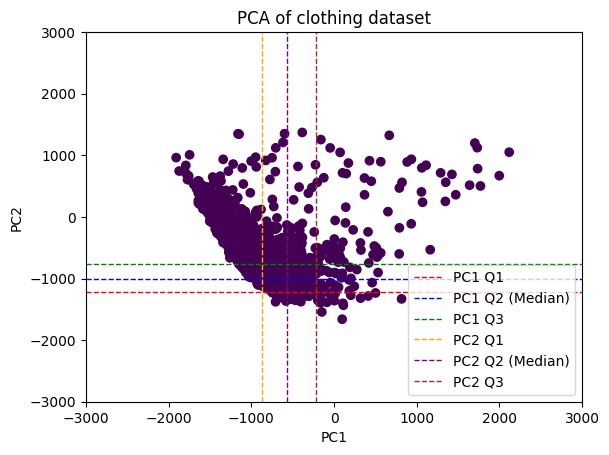

In [13]:

# Perform PCA
pca = PCA(n_components=2)
pca.fit(X_train)
pca_transformed_X_train = pca.transform(X_train[y_train==1])

# Set limits for x and y axes
xlim = (-3000, 3000)
ylim = (-3000, 3000)

# Scatter plot of PC1 vs PC2 
plt.scatter(pca_transformed_X_train[:, 0], pca_transformed_X_train[:, 1], c=y_train[y_train==1], cmap='viridis') #c=y_train[]

# Calculate marginal quantiles for PC1 and PC2 
quantiles_pc1 = mquantiles(pca_transformed_X_train[(pca_transformed_X_train[:, 0] >= xlim[0]) & (pca_transformed_X_train[:, 0] <= xlim[1]), 0], prob=[0.25, 0.5, 0.75])
quantiles_pc2 = mquantiles(pca_transformed_X_train[(pca_transformed_X_train[:, 1] >= ylim[0]) & (pca_transformed_X_train[:, 1] <= ylim[1]), 1], prob=[0.25, 0.5, 0.75])

# Plotting quantiles on the sides of the scatter plot
plt.axhline(quantiles_pc1[0], color='red', linestyle='--', linewidth=1, label='PC1 Q1')
plt.axhline(quantiles_pc1[1], color='blue', linestyle='--', linewidth=1, label='PC1 Q2 (Median)')
plt.axhline(quantiles_pc1[2], color='green', linestyle='--', linewidth=1, label='PC1 Q3')


plt.axvline(quantiles_pc2[0], color='orange', linestyle='--', linewidth=1, label='PC2 Q1')
plt.axvline(quantiles_pc2[1], color='purple', linestyle='--', linewidth=1, label='PC2 Q2 (Median)')
plt.axvline(quantiles_pc2[2], color='brown', linestyle='--', linewidth=1, label='PC2 Q3')

# Set limits for x and y axes
plt.xlim(xlim)
plt.ylim(ylim)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of clothing dataset')
plt.legend()

plt.show()


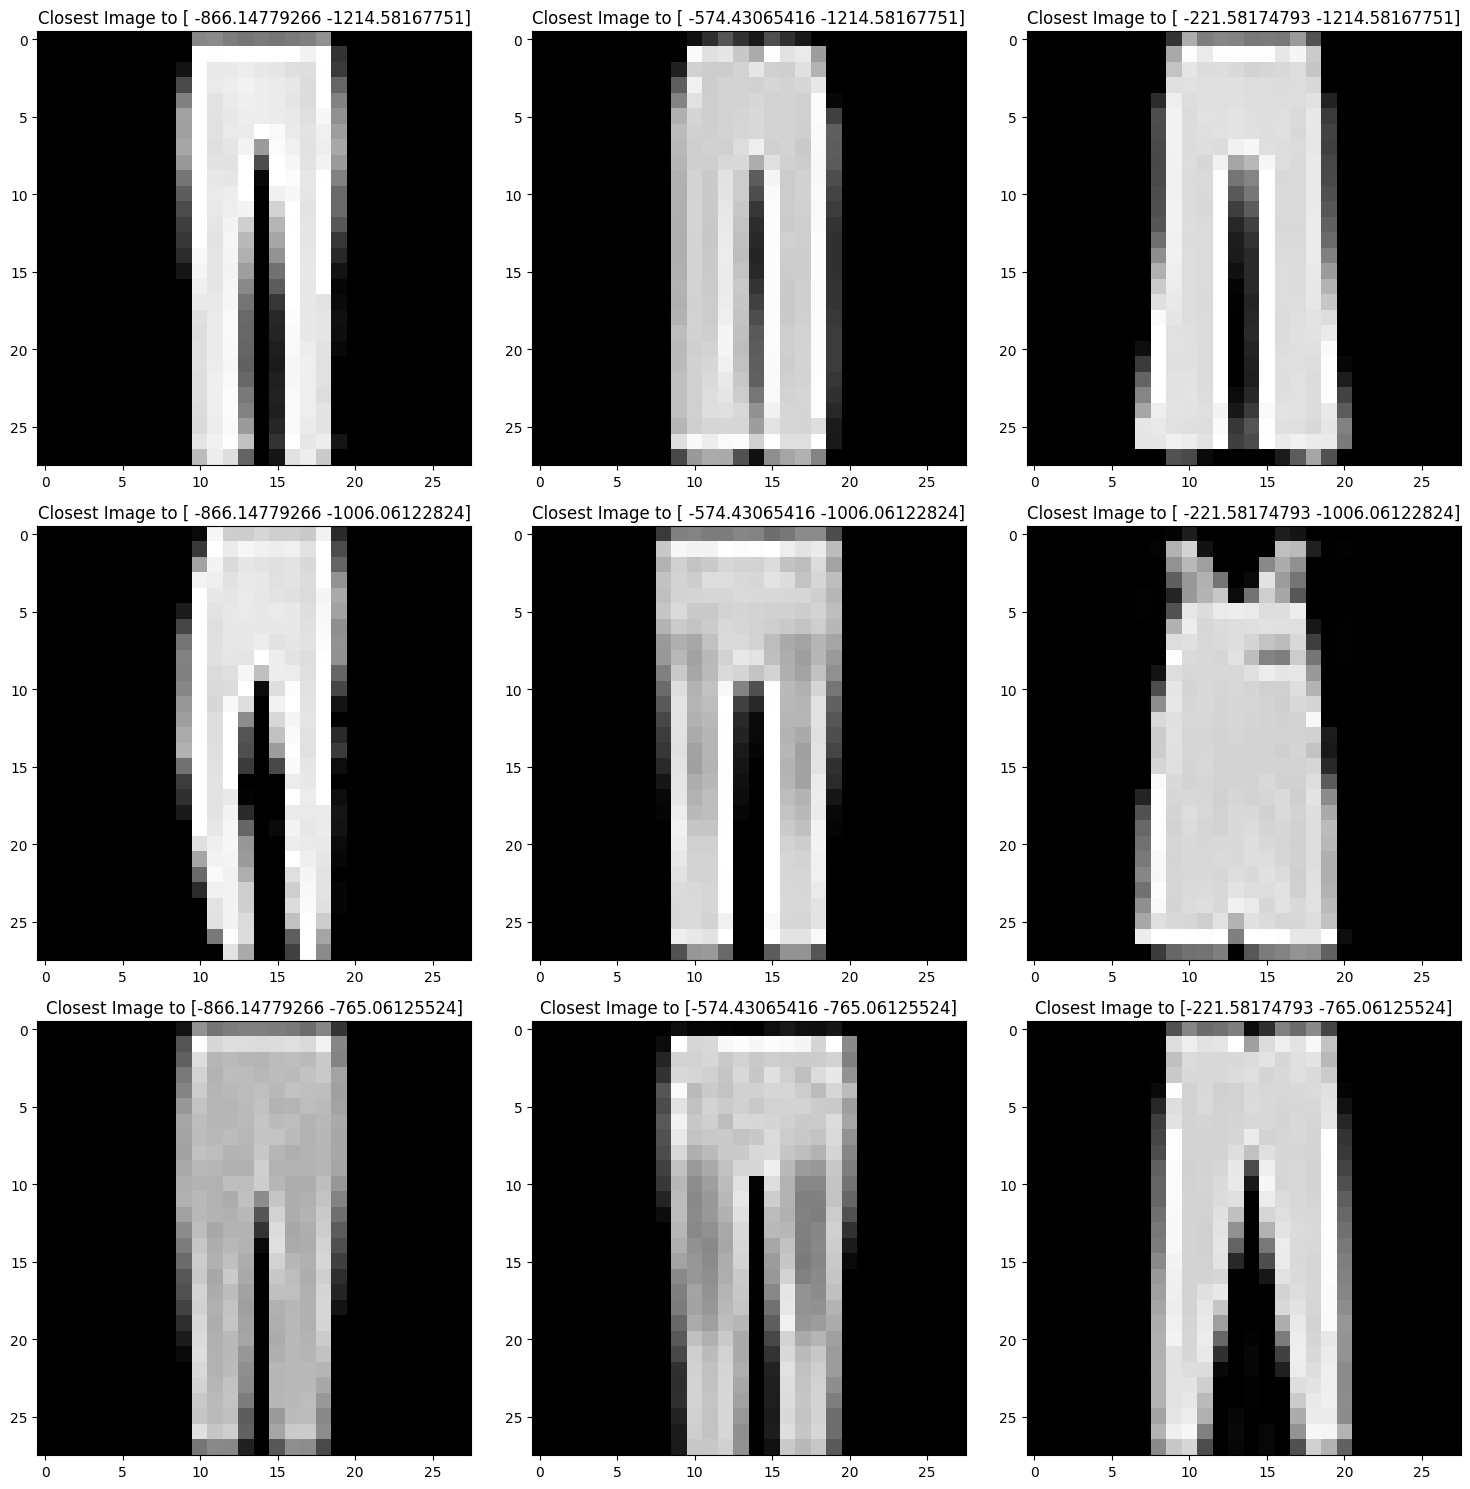

In [20]:
def find_img(pca_X, X, target_coordinates):
    num_images = len(target_coordinates)
    num_cols = 3  # Adjust the number of columns in the grid as needed
    num_rows = -(-num_images // num_cols)  # Ceiling division to determine the number of rows

    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

    for i, target_coord in enumerate(target_coordinates):
        # Calculate Euclidean distances
        distances = np.linalg.norm(pca_X - target_coord, axis=1)

        # Find the index of the point with the smallest distance
        closest_point_index = np.argmin(distances)

        # Assuming X_train is your original dataset
        closest_image = X[closest_point_index].reshape(28, 28)

        # Determine subplot position
        row_position = i // num_cols
        col_position = i % num_cols

        # Display the image in the subplot
        axes[row_position, col_position].imshow(closest_image, cmap='gray')
        axes[row_position, col_position].set_title(f'Closest Image to {target_coord}')

    # Remove empty subplots
    for i in range(len(target_coordinates), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

# Example usage
target_coordinates = np.array([[quantiles_pc2[0], quantiles_pc1[0]],
                               [quantiles_pc2[1], quantiles_pc1[0]],
                               [quantiles_pc2[2], quantiles_pc1[0]],
                               [quantiles_pc2[0], quantiles_pc1[1]],
                               [quantiles_pc2[1], quantiles_pc1[1]],
                               [quantiles_pc2[2], quantiles_pc1[1]],
                               [quantiles_pc2[0], quantiles_pc1[2]],
                               [quantiles_pc2[1], quantiles_pc1[2]],
                               [quantiles_pc2[2], quantiles_pc1[2]]])


find_img(pca_transformed_X_train, X_train[y_train==1], target_coordinates)
